#Email Spam Detection with the Naive Bayes Classifier as a Probabilistic Graphical Model: Parameter Estimation and Prediction

This problem appeared as a project in the edX course Computational Probability and Inference, MITx – 6.008.1x.  Here is the definition of the problem. 
For this problem, you should assume that each email $i$ has an unobserved class variable $C(i)$ which takes on either the value “spam" or the value “ham". Recall the notion of features: in our case, these features will be binary word occurrences. Let $\{w_1,\ldots,w_J\}$ be the set of all words used in all emails. Then, let Yj(i) be a binary random variable that takes on value 1 if wj appears in email i, and 0 if it does not. You can imagine that words like “viagra" would be very likely to occur in spam, but not as likely in ham.

The joint probability of class labels and features is given by

$\begin{eqnarray}
&&p_{C^{(1)},Y_1^{(1)}, \dots, Y_J^{(1)}, \dots,
     C^{(n)},Y_1^{(n)}, \dots, Y_J^{(n)}}
  (c^{(1)},y_1^{(1)},\dots,y_J^{(1)}, \dots,
   c^{(n)},y_1^{(n)},\dots,y_J^{(n)}; \theta) \\
% p_{C^{(1)}, \ldots, C^{(N)}, Y_{1}^{(1)}, \ldots, Y_{J}^{(N)}}(c^{(1)}, \ldots, c^{(N)}, y_{1}^{(1)}, \ldots, y_{J}^{(N)}) =
&&=
\prod_{i=1}^N
  \left[
    p_{C}(c^{(i)}; \theta)
    \prod_{j=1}^J p_{Y_{j} | C}(y_{j}^{(i)} | c^{(i)}; \theta)
  \right],
\end{eqnarray}$,

where θ consists of all the parameters $s,p_1,\ldots,p_J,q_1,\ldots,q_J$. We will assume that:

$\begin{eqnarray*}
p_{C^{(i)}}(c^{(i)}; \theta) &=&
\begin{cases} 
s & \text{if $c^{(i)} =$ spam} \\ 
1-s & \text{if $c^{(i)} =$ ham} 
\end{cases} \\
p_{Y_{j} | C}(y_{j}^{(i)} | \text{ham}; \theta) &=&
\begin{cases}
p_j & \text{if }y_j^{(i)} = 1 \\
1 - p_j & \text{if }y_j^{(i)} = 0
\end{cases} \\
p_{Y_{j} | C}(y_{j}^{(i)} | \text{spam}; \theta) &=&
\begin{cases}
q_j & \text{if }y_j^{(i)} = 1 \\
1 - q_j & \text{if }y_j^{(i)} = 0
\end{cases}
\end{eqnarray*}$

The *maximum likelihood estimate* for the parameter $p_j$ is just the fraction of ham emails that contain the word $w_j$, and similarly, the *maximum likelihood estimate* for $q_j$ is the fraction of spam emails that contain the word $w_j$. You should also be able to see that the maximum likelihood estimate for $s$ is the fraction of training documents that are spam. In order to avoid issues with *unseen words*, you should use *Laplace smoothing*.

(a)Training: First, estimate the parameters.

(b)Testing: Implement a function which classifies a new email using the *MAP rule*. How well does your classifier perform?

(c) Estimating $s$ from data is heavily reliant on the sizes of the data. In the real world, it's often difficult to find good training examples for ham, since nobody wants to give out their private email for the world to read. As a result, spam datasets often have many more spam examples than ham examples.

By setting $s$ manually, we can adjust how much the algorithm favors catching spam at the expense of falsely flagging a ham email. Try setting $s$ to a few values manually, and briefly explain what happens to your performance as $s$ increases and decreases. Specifically look at what happens to the number of false positives (ham emails incorrectly classified as spam) and the number of true positives (spam emails correctly classified as spam). 

In [16]:
#ipython nbconvert pcaiso.ipynb
%matplotlib inline

from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

The below figure shows the math used for parameter estimation during training and log odds ratio computation during testing / classicfication phase. There were 3675 spam and 1500 ham emails in the training dataset, whereas there were 49 spam and 51 ham emails in the test dataset.

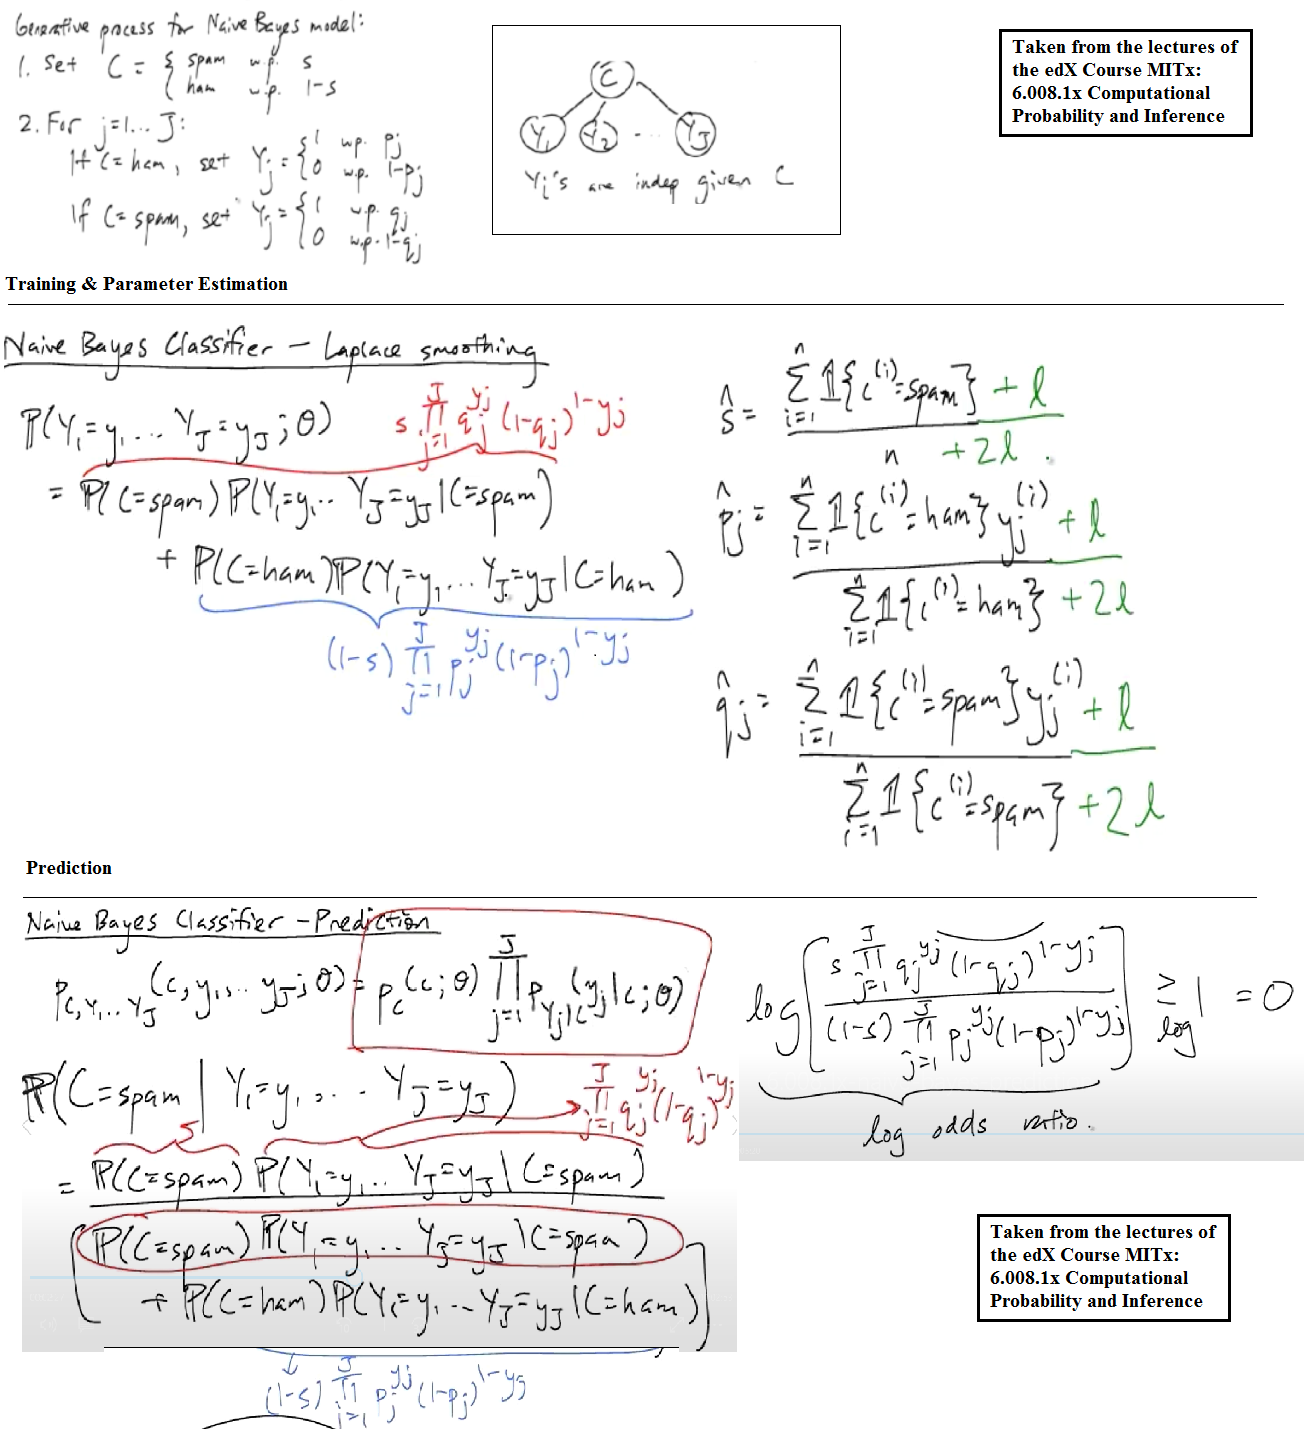

In [11]:
from IPython.display import Image
Image(filename='C:/courses/Edx/Current/MIT Computational Probability & Inference/Week9/nbt.png')

The below figures show the impact of prior on different accuracy measures. As can be seen, as s increases, both the number of true positives and the false positives tend to increase.

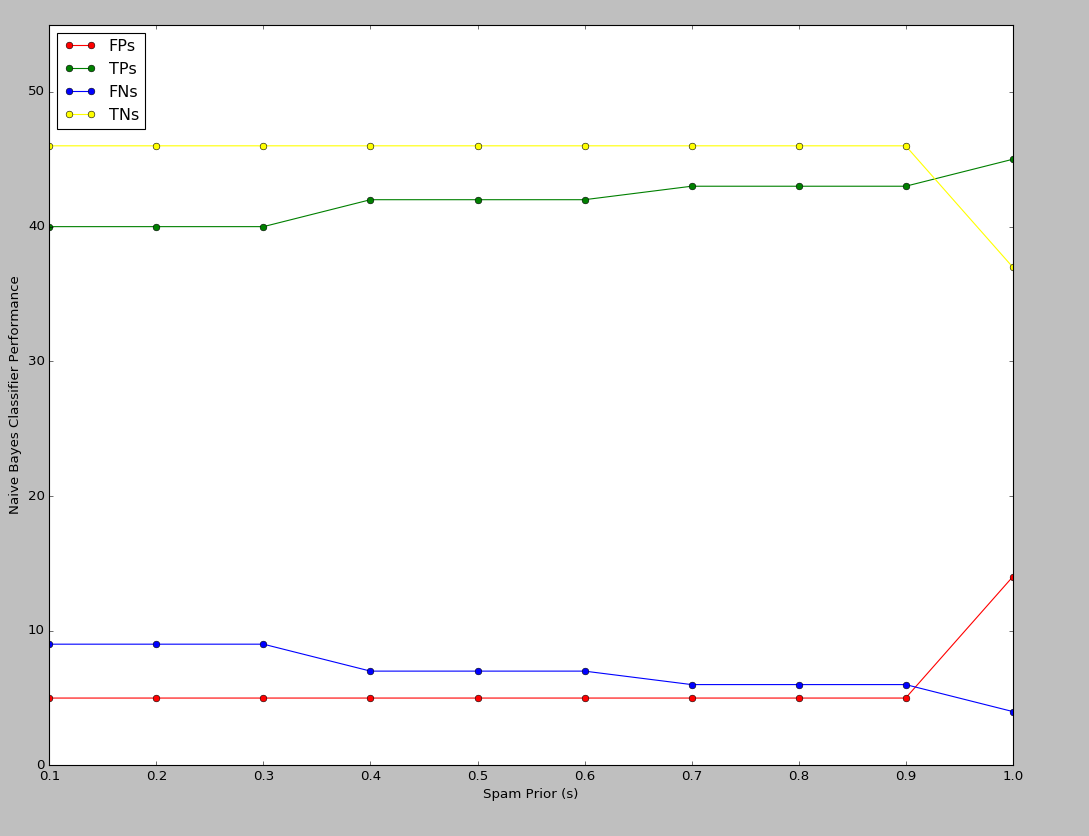

In [9]:
Image(filename='C:/courses/Edx/Current/MIT Computational Probability & Inference/Week9/performance.png')

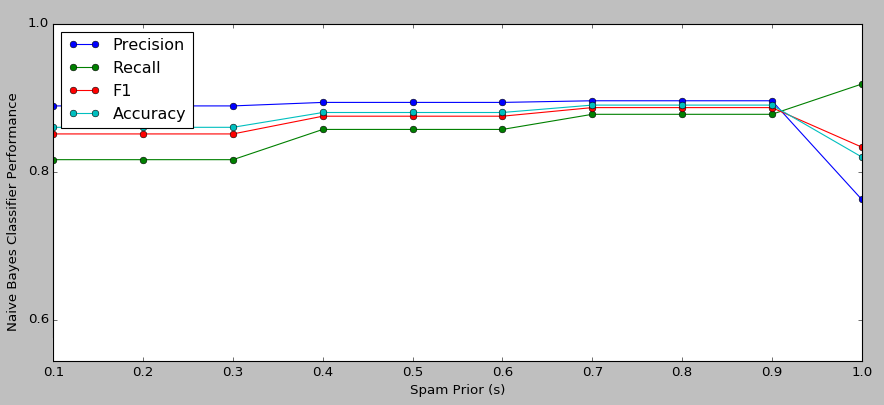

In [10]:
Image(filename='C:/courses/Edx/Current/MIT Computational Probability & Inference/Week9/performance1.png')